### Introduction

In this python notebook my first exploratory data analysis (EDA) in the data science course is presented.

### Preparation

Import the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

Import the dataset of the Bank Wages and get an overview of the dataset:

In [2]:
df = pd.read_csv('us_bank_wages/us_bank_wages.txt', sep="\t")
df.head()

,Unnamed: 0,SALARY,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT
0,0,57000,15,27000,1,0,3
1,1,40200,16,18750,1,0,1
2,2,21450,12,12000,0,0,1
3,3,21900,8,13200,0,0,1
4,4,45000,15,21000,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  474 non-null    int64
 1   SALARY      474 non-null    int64
 2   EDUC        474 non-null    int64
 3   SALBEGIN    474 non-null    int64
 4   GENDER      474 non-null    int64
 5   MINORITY    474 non-null    int64
 6   JOBCAT      474 non-null    int64
dtypes: int64(7)
memory usage: 26.0 KB


The column names have the following meanings:
- SALARY: current yearly salary in dollar
- EDUC: education (number of finished years)
- SALBEGIN: yearly salary at employee's first position at same bank in dollars
- GENDER: gender variable (0 for females, 1 for males)
- MINORITY: minority variable (0 for non-minorities, 1 for minorities)
- JOBCAT: job category (1 for administrative jobs, 2 for custodial jobs, 3 for management jobs)

The dataset seems to have three numerical and three categorical variables. Whereas the employee's gender is male/female, there's a certain amount of minorities and within the jobcategories three types are obvious.
The first column is redundant and can be dropped.

In [24]:
df = df.drop(['Unnamed: 0'], axis=1)

### Describing the Dataset

All the numerical values can be statistically described as follows:

In [25]:
df[['SALARY', 'EDUC', 'SALBEGIN']].describe()

,SALARY,EDUC,SALBEGIN
count,474.000000,474.000000,474.000000
mean,34419.567511,13.491561,17016.086498
std,17075.661465,2.884846,7870.638154
min,15750.000000,8.000000,9000.000000
25%,24000.000000,12.000000,12487.500000
50%,28875.000000,12.000000,15000.000000
75%,36937.500000,15.000000,17490.000000
max,135000.000000,21.000000,79980.000000


The absolute amount of male/female employees and (non-)minorities is given below. Structured by the three job categories:

In [26]:
pd.crosstab(df.JOBCAT, df.GENDER)

GENDER,0,1
JOBCAT,,
1,206,157
2,0,27
3,10,74


In [27]:
pd.crosstab(df.JOBCAT, df.MINORITY)

MINORITY,0,1
JOBCAT,,
1,276,87
2,14,13
3,80,4


### Correlations between Features

To get a first impression about each correlation, below you can see the a heatmap showing positive and negative correlations between features. Then the same combinations are showen via scatterplots.

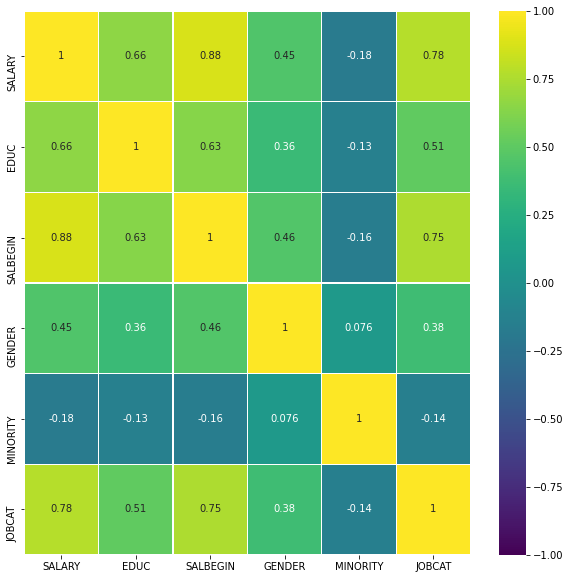

In [31]:
df_kor = df.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1);

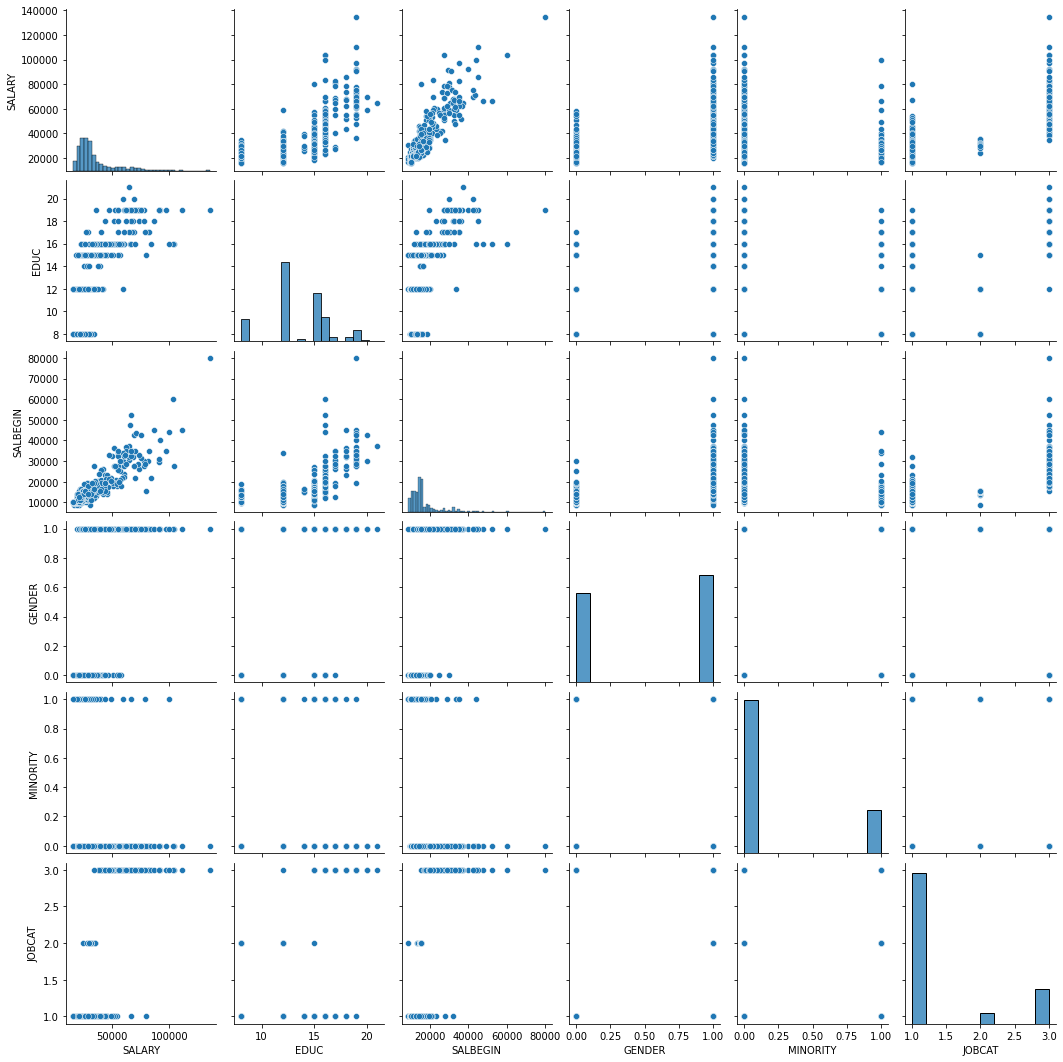

In [30]:
X = df[['SALARY', 'EDUC', 'SALBEGIN', 'GENDER', 'MINORITY', 'JOBCAT']]
sns.pairplot(X, kind='scatter');

Both visualizations can give a first impression about how the features are correlated with each other. Furhtermore the diagonal of the scatterplots show the frequency distributions.
The following can be stated:
- there is a high positive correlation between the actual salary and the starting salary
- the jobtype has an impact on both the starting and the actual salary
- the level of education seems to have an impact on both the starting and the actual salary

Let's have a more detailed look at the data. It could reveal some more insights about how the features have an impact on the employee's salaries.

### Analysis of feature distributions

#### Gender/Minority & Jobcategory

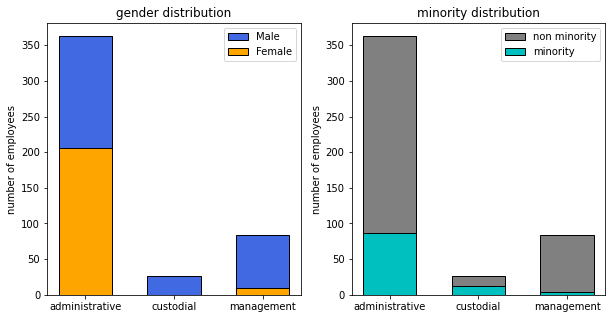

In [66]:
plt.style.use('seaborn-bright')

plt.figure(figsize=(10,5))

plt.subplot(121)
job_gender_df = pd.crosstab(df.JOBCAT, df.GENDER)
gender = ['Male', 'Female']
p1 = plt.bar(np.arange(3), job_gender_df[1], 0.6, edgecolor='black', color='royalblue', bottom=job_gender_df[0])
p2 = plt.bar(np.arange(3), job_gender_df[0], 0.6, edgecolor='black', color='orange')
plt.ylabel('number of employees')
plt.title('gender distribution')
plt.xticks(np.arange(3), ['administrative', 'custodial', 'management'])
#plt.xticks(rotation=45)
plt.legend(gender,loc=1)

plt.subplot(122)
job_mino_df = pd.crosstab(df.JOBCAT, df.MINORITY)
minority = ['non minority', 'minority']
p1 = plt.bar(np.arange(3), job_mino_df[0], 0.6, edgecolor='black', color='gray', bottom=job_mino_df[1])
p2 = plt.bar(np.arange(3), job_mino_df[1], 0.6, edgecolor='black', color='c')
plt.ylabel('number of employees')
plt.title('minority distribution')
plt.xticks(np.arange(3), ['administrative', 'custodial', 'management'])
#plt.xticks(rotation=45)
plt.legend(minority,loc=1)

plt.show()

Observations:
- custodial jobs are done only by males
- most managers are males
- comparing to administrative jobs: there are almost no minorities in manager positions and there is a high amount of minorities

#### Actual Salary vs Starting Salary

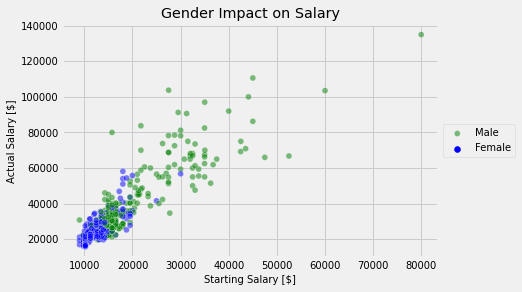

In [80]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
g=sns.scatterplot(
    data=df,
    x='SALBEGIN',           
    y='SALARY',
    hue='GENDER',          
    #size='MINORITY',
    #style='JOBCAT',
    alpha=0.5,
    palette=['blue','green']
    )
g.legend(
    loc='center left',   
    bbox_to_anchor=(1.0, 0.5),  
    ncol=1,
    labels=['Male', 'Female']                    
    )
plt.xlabel("Starting Salary [$]")
plt.ylabel("Actual Salary [$]")
plt.title('Gender Impact on Salary');

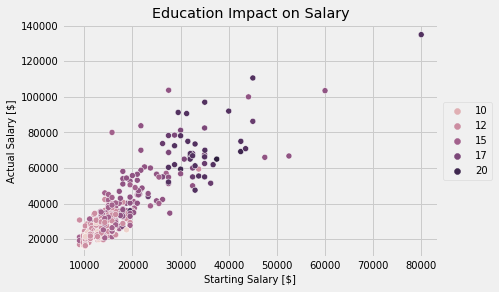

In [85]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
g=sns.scatterplot(
    data=df,
    x='SALBEGIN',           
    y='SALARY',
    hue='EDUC',          
    #size='MINORITY',
    #style='JOBCAT',
    #alpha=0.8
    )
g.legend(
    loc='center left',   
    bbox_to_anchor=(1.0, 0.5),  
    ncol=1,
    #labels=['Male', 'Female']                    
    )
plt.xlabel("Starting Salary [$]")
plt.ylabel("Actual Salary [$]")
plt.title('Education Impact on Salary');

Observations:
- the higher the completed years of education, the higher the payment
- the higher the starting salary, the higher the actual salary
- female employees receive a lower payment

#### Actual Salary Distribution of Male & Female

In [86]:
salary_m = df[df['GENDER']==1].SALARY
salary_f = df[df['GENDER']==0].SALARY

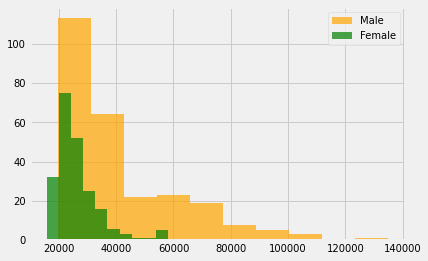

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(salary_m, label="Male", alpha=0.7, color='orange')
ax.hist(salary_f, label="Female", alpha=0.7, color='green')
ax.legend();

#### Starting Salary Distribution of Male & Female

In [94]:
salbegin_m = df[df['GENDER']==1].SALBEGIN
salbegin_f = df[df['GENDER']==0].SALBEGIN

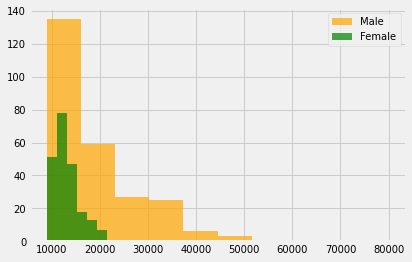

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(salbegin_m, label="Male", alpha=0.7, color='orange')
ax.hist(salbegin_f, label="Female", alpha=0.7, color='green')
ax.legend();

Observations:
- in both salary types the distributions are high right skewed
- in both plots female employees receive lower payment

#### Education vs Salaries

Text(0.5, 1.0, 'Education vs Salary')

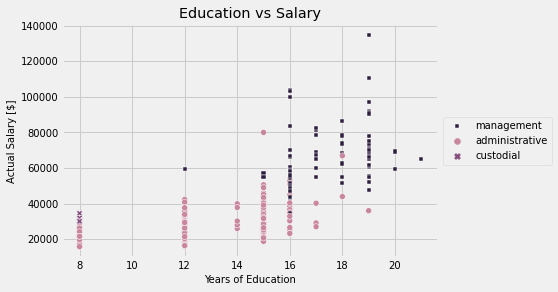

In [109]:
plt.style.use('fivethirtyeight') # 'dark_background', 'fivethirtyeight', 'grayscale', ...
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
g=sns.scatterplot(
    data=df,
    x='EDUC',           
    y='SALARY',
    hue='JOBCAT',             
    hue_norm=(0,3),
    style='JOBCAT',
    #size='SALBEGIN',       
    #sizes=(20,200)
    )
g.legend(
    loc='center left',          # location of the legend
    bbox_to_anchor=(1.0, 0.5),  # horizontal and vertical position of the legend
    ncol=1,                      # number of legend columns
    labels=['management', 'administrative', 'custodial']
    )
plt.xlabel("Years of Education")
plt.ylabel("Actual Salary [$]")
plt.title('Education vs Salary')

Observations:
- management employees have more years of education completed
- narrow distribution of custodials; can be neglected in further analyses
- years of education have categorical characteristics; number of years stands for special grades 

#### Education Distribution for Man and Woman

In [111]:
educ_m = df[df['GENDER']==1].EDUC
educ_f = df[df['GENDER']==0].EDUC

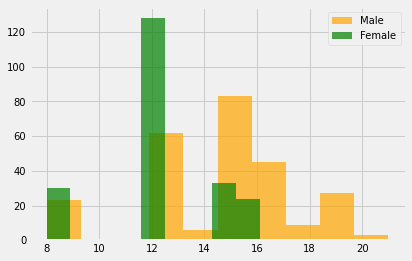

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(educ_m, label="Male", alpha=0.7, color='orange')
ax.hist(educ_f, label="Female", alpha=0.7, color='green')
ax.legend();

Observations:
- male employees seem to have higher education
- years of education above 16 just for male employees

#### Salary distribution for Managers & Administratives

In [113]:
manager_m = df[(df['GENDER']==1) & (df['JOBCAT']==3)].SALARY
manager_f = df[(df['GENDER']==0) & (df['JOBCAT']==3)].SALARY

In [114]:
admin_m = df[(df['GENDER']==1) & (df['JOBCAT']==1)].SALARY
admin_f = df[(df['GENDER']==0) & (df['JOBCAT']==1)].SALARY

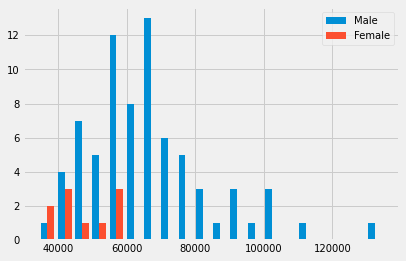

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist([manager_m, manager_f], label=("Male", "Female"), bins=20)
ax.legend()

### Salary distribution for administrative jobs (& Gender)

In [206]:
admin_m = df[(df['GENDER']==1) & (df['JOBCAT']==1)].SALARY
admin_f = df[(df['GENDER']==0) & (df['JOBCAT']==1)].SALARY

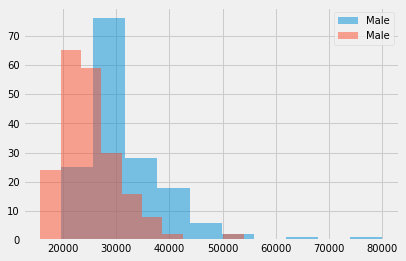

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(admin_m, label=("Male", "Female"), bins=10, alpha=0.5)
ax.hist(admin_f, label=("Male", "Female"), bins=10, alpha=0.5)
ax.legend()

### Education vs Salaries (for Management)

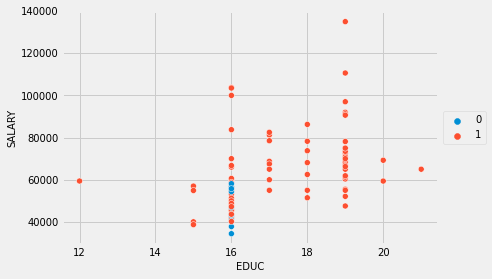

In [187]:
plt.style.use('fivethirtyeight') # 'dark_background', 'fivethirtyeight', 'grayscale', ...
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
#sns.relplot(data=df, x='temp_min', y='temp_max', hue='wind', size='precipitation')
g=sns.scatterplot(
    data=df[df.JOBCAT==3],
    x='EDUC',           
    y='SALARY',
    hue='GENDER',                 # group points by color
    #size='MINORITY'        # group points by size
    #style='JOBCAT'
    )
g.legend(
    loc='center left',          # location of the legend
    bbox_to_anchor=(1.0, 0.5),  # horizontal and vertical position of the legend
    ncol=1                      # number of legend columns
    )
#plt.xlabel("Minimum Temperature [°C]")
#plt.ylabel("Maximum Temperature [°C]")
#plt.title('Minimum vs. Maximum Temperature (Seattle Weather)')

### Education vs Salaries (for administrative Jobs)

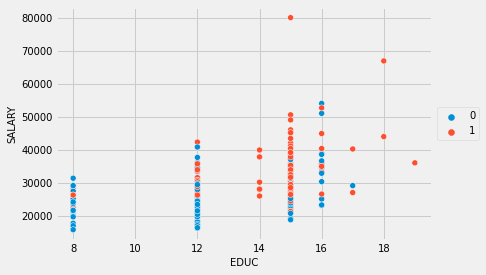

In [186]:
plt.style.use('fivethirtyeight') # 'dark_background', 'fivethirtyeight', 'grayscale', ...
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
#sns.relplot(data=df, x='temp_min', y='temp_max', hue='wind', size='precipitation')
g=sns.scatterplot(
    data=df[df.JOBCAT==1],
    x='EDUC',           
    y='SALARY',
    hue='GENDER',                 # group points by color
    #size='MINORITY'        # group points by size
    #style='JOBCAT'
    )
g.legend(
    loc='center left',          # location of the legend
    bbox_to_anchor=(1.0, 0.5),  # horizontal and vertical position of the legend
    ncol=1                      # number of legend columns
    )
#plt.xlabel("Minimum Temperature [°C]")
#plt.ylabel("Maximum Temperature [°C]")
#plt.title('Minimum vs. Maximum Temperature (Seattle Weather)')

### Distribution of Salaries for Man and Woman @Management & @16y of Education

In [209]:
manager_16_df_m = df[(df['JOBCAT']==3) & (df['EDUC']==16) & (df['GENDER']==1)].SALARY
manager_16_df_f = df[(df['JOBCAT']==3) & (df['EDUC']==16) & (df['GENDER']==0)].SALARY

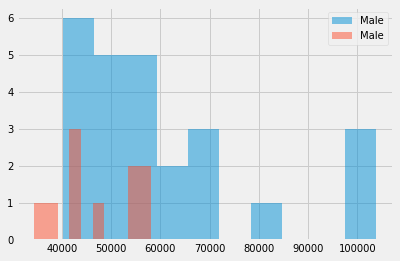

In [211]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(manager_16_df_m, label=("Male", "Female"), alpha=0.5)
ax.hist(manager_16_df_f, label=("Male", "Female"), alpha=0.5)
ax.legend()

### Distribution of Salaries for Man and Woman @Admin & @8y of Education

In [212]:
admin_8_df_m = df[(df['JOBCAT']==1) & (df['EDUC']==8) & (df['GENDER']==1)].SALARY
admin_8_df_f = df[(df['JOBCAT']==1) & (df['EDUC']==8) & (df['GENDER']==0)].SALARY

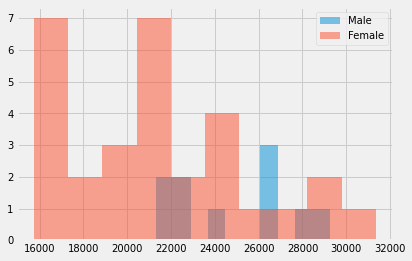

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(admin_8_df_m, label="Male", alpha=0.5)
ax.hist(admin_8_df_f, label="Female", alpha=0.5)
ax.legend()

### Distribution of Salaries for Man and Woman @Admin & @12y of Education

In [216]:
admin_12_df_m = df[(df['JOBCAT']==1) & (df['EDUC']==12) & (df['GENDER']==1)].SALARY
admin_12_df_f = df[(df['JOBCAT']==1) & (df['EDUC']==12) & (df['GENDER']==0)].SALARY

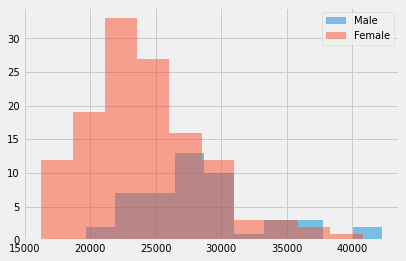

In [217]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(admin_12_df_m, label="Male", alpha=0.5)
ax.hist(admin_12_df_f, label="Female", alpha=0.5)
ax.legend()

In [ ]:
# Plots nebeneinander in seaborn

#%% 2 plot with plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('2 x 3 plot')

sns.lineplot(ax=axes[0, 0],  x=x, y=y)
sns.lineplot(ax=axes[0, 1],  x=x, y=y)
sns.lineplot(ax=axes[0, 2],  x=x, y=y)
sns.lineplot(ax=axes[1, 0],  x=x, y=y)
sns.lineplot(ax=axes[1, 1],  x=x, y=y)
sns.lineplot(ax=axes[1, 2],  x=x, y=y)

axes[0,0].set_title('sub fig 0 0')
axes[1,1].set_title('sub fig 1 1')
axes[1,2].set_title('sub fig 1 2')

#Note: to increase the size of all the labels in the same time, a simple solution is to use:
sns.set(font_scale=1.2)

fig.tight_layout() # fix space
plt.show()